# Create a spectrogram 

### Function to calculate spectrogram
```
% Create a simple spectrogram 
% Input 
%	X - initial signal 
% 	W - window length 
%	s - stride 
% Output
%   result - image produced by the spectrogram

function [result] = SPECTROGRAM(y,W,s)
    num_iter = int16((size(y,1) - W)/s) + 1;
    fin_img = zeros(num_iter,W+1);
    result = zeros(num_iter,int16(size(fin_img,2)/2));
    for i = [1:num_iter-2]
        f_y = fft(y(i*s:W + i*s));
        f_y = fftshift(f_y);
        fin_img(i,1:size(f_y)) = abs(f_y);
    end
    fin_img = log(fin_img +1);
    fin_img = mat2gray(fin_img);
    result = fin_img(1:min(size(result,1),int16(W/2)) ,int16(end/2) + 1:end);
    imshow(result);
    axis on;
    ylabel('Samples');
    xlabel('Frequency');
    colorbar;
    title('New Spectrogram');
end
```

### Run on different sounds and compare image produced

##### 1.handel

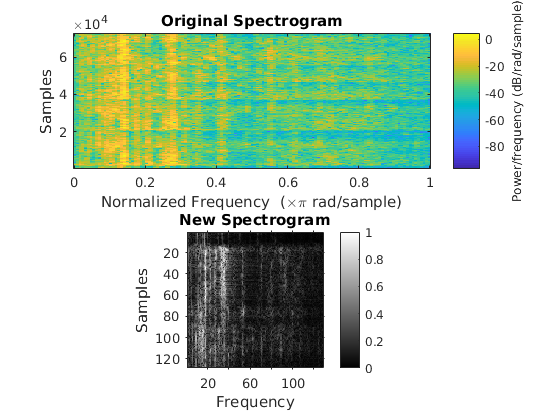

In [6]:
load 'handel.mat';
sound(y);

W = 256;
s = 128;

% Using inbuilt spectrogram 
figure;
subplot(2,1,1);
spectrogram(y,W,W/s);
title('Original Spectrogram');

% Using my spectrogram 
subplot(2,1,2);
fin_img = SPECTROGRAM(y,W,s);

##### 2.Train

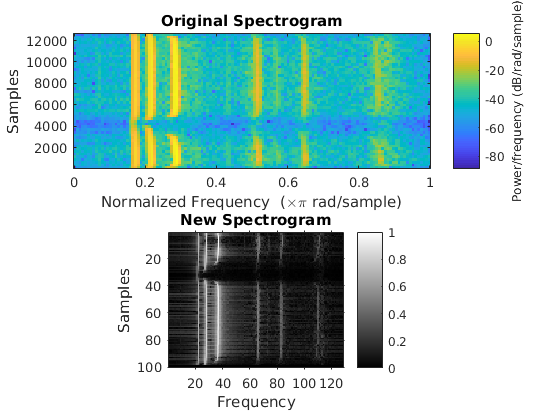

In [2]:
load train;
sound(y);

W = 256;
s = 128;

% Using inbuilt spectrogram 
figure;
subplot(2,1,1);
spectrogram(y,W,W/s);
title('Original Spectrogram');

% Using my spectrogram 
subplot(2,1,2);
fin_img = SPECTROGRAM(y,W,s);

##### 3.Laughter

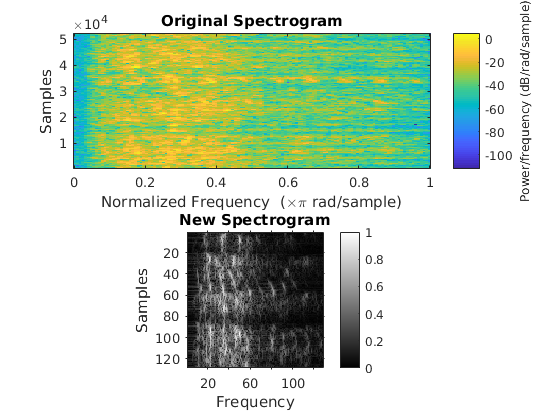

In [1]:
load laughter;
sound(y);

W = 256;
s = 64;

% Using inbuilt spectrogram 
figure;
subplot(2,1,1);
spectrogram(y,W,W/s);
title('Original Spectrogram');

% Using my spectrogram 
subplot(2,1,2);
fin_img = SPECTROGRAM(y,W,s);

### Results 

### Window size
- Lesser window size => coarse image
- Wider window size => fine image

- because precision of fft reduces with decrease in N(width)

### Stride
- More stride less width of spectrogram
- Less stride more time to compute